In [128]:
%reload_ext autoreload
%autoreload 2

import os
import json

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
from astropy import units as u
from astropy.constants import k_B, h, c, m_p, m_e, eps0, e
k_B = k_B.to(u.erg / u.K)
h = h.to(u.erg * u.s)
c = c.to(u.cm / u.s)
m_p = m_p.to(u.g)
m_e = m_e.to(u.g)

import plot_utils as pu
import utils as ut
from data_utils import data_dic
from data_utils import atomic_data as at

In [129]:
with open('../results/abundances.json', 'r') as fp:
    results = json.load(fp)

stars = ['t6000', 't8000']

lgTauR = np.array(data_dic['t6000']['data']['lgTauR'])

In [130]:
from utils import sl

R = 1.0968e5 
lambdas = np.array([n**2 / R for n in [1,2,3]])
d_lamb = 1e-8
lambdas_pm = [[lamb-d_lamb, lamb+d_lamb] for lamb in lambdas]
lambdas_pm = [item for sublist in lambdas_pm for item in sublist]
lambdas_pm = np.array(lambdas_pm)

def str_tb(arr):
    lis = list(arr)
    lis = [sl(i) for i in lis]
    stri = ' & '.join(lis)
    return stri

tauR_1 = 1
tauR = 10**lgTauR
id1 = np.argmin(np.abs(tauR - tauR_1))

row_names = [r'$\kappa_{\rm es}$', 
             r'$\kappa_{\rm ff} \, ({\rm H^{-}})$ ', 
             r'$\kappa_{\rm ff}\, ({\rm HI})$',
             r'$\kappa_{\rm bf}\, ({\rm H^{-}_{(1)}})$',
             r'$\kappa_{\rm bf}\, ({\rm HI^{(1)}})$',
             r'$\kappa_{\rm bf}\, ({\rm HI^{(2)}})$',
             r'$\kappa_{\rm bf}\, ({\rm HI^{(3)}})$',
             r'$\kappa_{\rm bf}\, ({\rm HI})$']

x=''
temps = ['6000', '8000']
for temp in temps:
    vals = results['t'+temp]
    data = data_dic['t'+temp]['data']

    Pe = data['Pe'][id1]
    T = data['T'][id1]
    NHI = vals['NHI'][id1]
    NHII = vals['NHII'][id1]
    NHm = vals['NH-'][id1]
    NHI1 = vals['NHI1'][id1]
    NHI2 = vals['NHI2'][id1]
    NHI3 = vals['NHI3'][id1]
    Ne =  vals['Ne'][id1]

    k_es = np.array([ut.kappa_es(Ne)]*len(lambdas_pm))

    k_ff_Hm = ut.Hm_kappa_ff(lambdas_pm, T, Pe,  Ne)
    k_ff_HI = ut.HI_kappa_ff(lambdas_pm, T, NHII, Ne)

    k_bf_Hm = ut.Hm_kappa_bf(lambdas_pm, NHm)
    k_bf_HI1 = ut.HI_kappa_bf(lambdas_pm, NHI1, n=1)
    k_bf_HI2 = ut.HI_kappa_bf(lambdas_pm, NHI2, n=2)
    k_bf_HI3 = ut.HI_kappa_bf(lambdas_pm, NHI3, n=3)
    k_bf_HI = k_bf_HI1 + k_bf_HI2 + k_bf_HI3

    kappas = [k_es, k_ff_Hm, k_ff_HI, k_bf_Hm, k_bf_HI1, k_bf_HI2, k_bf_HI3, k_bf_HI]

    for i, rn in enumerate(row_names):
        first = rf'\multirow{{2}}{{*}}{{{temp}}}' if i == 3 else f'{x:<21}'  
        line = r'\cline{2-8}' if (i not in [len(kappas)-1]) else r'\hline'
        row = rf'{first} & {rn} & {str_tb(kappas[i])} \\ {line}'
        print(row)


                      & $\kappa_{\rm es}$ & $4.58 \times 10^{-11}$ & $4.58 \times 10^{-11}$ & $4.58 \times 10^{-11}$ & $4.58 \times 10^{-11}$ & $4.58 \times 10^{-11}$ & $4.58 \times 10^{-11}$ \\ \cline{2-8}
                      & $\kappa_{\rm ff} \, ({\rm H^{-}})$  & $3.26 \times 10^{-13}$ & $3.27 \times 10^{-13}$ & $3.53 \times 10^{-12}$ & $3.53 \times 10^{-12}$ & $1.58 \times 10^{-11}$ & $1.58 \times 10^{-11}$ \\ \cline{2-8}
                      & $\kappa_{\rm ff}\, ({\rm HI})$ & $7.25 \times 10^{-13}$ & $7.30 \times 10^{-13}$ & $4.48 \times 10^{-11}$ & $4.49 \times 10^{-11}$ & $5.11 \times 10^{-10}$ & $5.11 \times 10^{-10}$ \\ \cline{2-8}
\multirow{2}{*}{6000} & $\kappa_{\rm bf}\, ({\rm H^{-}_{(1)}})$ & $3.08 \times 10^{-8}$ & $3.09 \times 10^{-8}$ & $1.64 \times 10^{-7}$ & $1.65 \times 10^{-7}$ & $3.18 \times 10^{-7}$ & $3.18 \times 10^{-7}$ \\ \cline{2-8}
                      & $\kappa_{\rm bf}\, ({\rm HI^{(1)}})$ & $9.80 \times 10^{-1}$ & $0.00$ & $0.00$ & $0.00$ & $0.00$ & $0

In [131]:
import numpy as np

# Assuming data_dic and results are predefined dictionaries

stars = ['t6000', 't8000']
M = 1000
lambdas = np.linspace(100, 20000, M)*u.AA
lambdas = lambdas.to(u.cm).value

arrays = {}
for star in stars:
    arrays[star] = {
        'Pe': np.array(data_dic[star]['data']['Pe']),
        'T': np.array(data_dic[star]['data']['T']),
        'NHI': np.array(results[star]['NHI']),
        'NHII': np.array(results[star]['NHII']),
        'NHI1': np.array(results[star]['NHI1']),
        'NHI2': np.array(results[star]['NHI2']),
        'NHI3': np.array(results[star]['NHI3']),
        'NHm': np.array(results[star]['NH-']),
        'Ne': np.array(results[star]['Ne'])
    }

# Meshgrid operations
for star in stars:
    keys = list(arrays[star].keys())  # Create a copy of the keys to iterate over
    for key in keys:
        arrays[star][f"A{key}"], arrays[star][f"AL"] = np.meshgrid(arrays[star][key], lambdas)

# Calculations
for star in stars:
    arrays[star]['kappa_es'] = ut.kappa_es(arrays[star]['ANe'])
    arrays[star]['HI_kappa_ff'] = ut.HI_kappa_ff(arrays[star]['AL'], arrays[star]['AT'], arrays[star]['ANHII'], arrays[star]['ANe'])

    arrays[star]['HI_kappa_bf'] = sum([ut.HI_kappa_bf(arrays[star]['AL'], arrays[star][f'ANHI{n}'], n=n) for n in range(1, 4)])
    arrays[star]['Hm_kappa_ff'] = ut.Hm_kappa_ff(arrays[star]['AL'], arrays[star]['AT'], arrays[star]['APe'], arrays[star]['ANHI'])
    arrays[star]['Hm_kappa_bf'] = ut.Hm_kappa_bf(arrays[star]['AL'], arrays[star]['ANHm'])

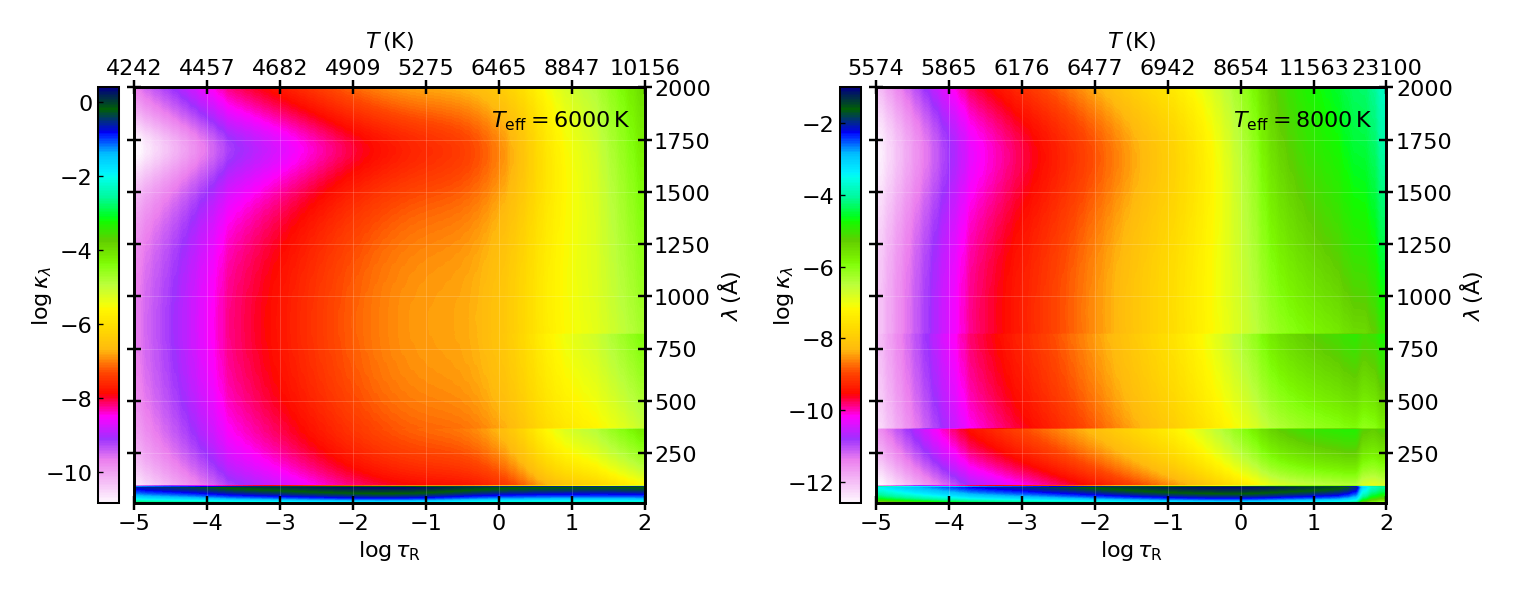

In [132]:
kappas = ['kappa_es', 'Hm_kappa_ff', 'HI_kappa_ff', 'Hm_kappa_bf', 'HI_kappa_bf']

ts = 1.65
Fig = pu.Figure(subplots=(1,2), theme='default', ratio=3.25, ts=ts, minor_ticks=False)
fig = Fig.fig
axes = Fig.axes

fs = Fig.fs
sw = Fig.sw

for i, star in enumerate(stars):

    ax = axes[0][i]
    Fig.customize_axes(ax, ylabel_pos='right')
    ax.grid(color='white', linestyle='-', linewidth=0.05*fs)

    data = data_dic[star]['data']

    arr = np.zeros(arrays[star]['kappa_es'].shape)
    for kappa in kappas:
        arr += arrays[star][kappa]

    #ax.imshow(np.log10(arr), origin='lower', aspect='auto')
    val = arrays[star]['kappa_es'] 
    val = arr

    data = data_dic[star]['data']

    T = np.array(data['T'])
    lgTauR = np.array(data['lgTauR'])

    cmap = 'nipy_spectral'
    cmap = 'gist_ncar_r'
    im = ax.imshow(np.log10(val), origin='lower', aspect='auto', cmap=cmap, extent=[lgTauR[0], lgTauR[-1], lambdas[0]*1e7, lambdas[-1]*1e7])

    # twin axes
    ax2 = ax.twiny()
    xticks = ax.get_xticks()
    ax2.set_xticks(xticks)
    # for tick in xticks find the position in lgTauR
    T_ticks = []
    for tick in xticks:
        i = np.argmin(np.abs(lgTauR - tick))
        T_ticks.append(f'{T[i]:0.0f}')
    ax2.set_xticklabels(T_ticks)
    ax2.set_xlabel(r'$T \, ({\rm K})$', fontsize=fs*ts, labelpad=fs*sw*4)



    Fig.customize_axes(ax2, xlabel_pos='top', grid=False)

    ax.set_xlabel(r'$\log\tau_{\rm R}$', fontsize=fs*ts, labelpad=fs*sw*2)
    ax.set_ylabel(r'$\lambda \, ({\rm \AA})$', fontsize=fs*ts, labelpad=fs*sw*2)


    # add cbar
    cbar = fig.colorbar(im, ax=ax,  location='left', pad=0.0075*fs)
    cbar.set_label(r'$\log\kappa_{\lambda}$', fontsize=fs*ts, labelpad=-fs*sw*3)
    cbar.ax.tick_params(labelsize=fs*ts, size=fs*sw*2, direction='in', width=fs*sw*0.5, pad=fs*sw*2)
    cbar.outline.set_linewidth(0.15*fs)
    # place cbar on left
    cbar.ax.yaxis.set_ticks_position('left')
    cbar.ax.yaxis.set_label_position('left')

    # add text
    ax.text(0.7, 0.95, rf'$T_{{\rm eff}}={star[1:]} \, {{\rm K}}$', transform=ax.transAxes, fontsize=fs*ts, va='top', ha='left', color='k')

savefold = '../figures/'
if not os.path.exists(savefold):
    os.makedirs(savefold)
figname = f'k_cont_stars.png'
savepath = savefold + figname

fig_h = Fig.fig_height
fig_w = Fig.fig_width
x0, y0 = 0.12*fig_w, -.025*fig_h
x1, y1 = 0.965*fig_w, 1.0*fig_h
Fig.save(savepath, 
         bbox_inches=mpl.transforms.Bbox([[x0, y0], [x1, y1]]))

Line Opacities

In [133]:
# from Allen's

e = e.esu

gs = [2, 8, 18]

wavelengths = [1215.67, 1025.72, 6562.74]
fs = [0.4162, 0.07910, 0.6407]
As = [4.699e8, 5.575e7, 4.410e7]
lines = ['L_alpha', 'L_beta', 'H_alpha']

line_dic = {}
for i, line in enumerate(lines):
    line_dic[line] = {'wavelength': wavelengths[i], 'f': fs[i]}
    line_dic[line]['A'] = As[i]

    sigma = np.pi * e.value**2 / (m_p.value * c.value) * fs[i]
    line_dic[line]['sigma'] = sigma

line_dic['L_alpha']['damp'] = 4*np.pi * As[0]
line_dic['L_beta']['damp'] = 4*np.pi * (As[1] + As[0])
line_dic['H_alpha']['damp'] = 4*np.pi * (As[2])


# print sigmas
# for line in lines:
#     print(line, line_dic[line]['sigma'])
#     print(line+' f:', line_dic[line]['f'])
#     print(line+' damp:', line_dic[line]['damp'])

In [11]:
with open('../results/abundances.json', 'r') as fp:
    results = json.load(fp)

stars = ['t6000', 't8000']

lgTauR = np.array(data_dic['t6000']['data']['lgTauR'])

tauR_1 = 1
tauR = 10**lgTauR
id1 = np.argmin(np.abs(tauR - tauR_1))


temps = ['6000', '8000']
dic_kappas = {temp: {} for temp in temps}

for temp in temps:
    print(temp)
    vals = results['t'+temp]
    NHI1 = vals['NHI1'][id1]
    NHI2 = vals['NHI2'][id1]
    NHI3 = vals['NHI3'][id1]
    NS = [NHI1, NHI2, NHI3]
    
    nl, nu = 1, 2 
    kappa_La = line_dic['L_alpha']['sigma'] * (NS[nl-1] - (gs[nl-1]/gs[nu-1])*NS[nu-1])
    dic_kappas[temp]['kappa_La'] = kappa_La

    nl, nu = 1, 3
    kappa_Lb = line_dic['L_beta']['sigma'] * (NS[nl-1] - (gs[nl-1]/gs[nu-1])*NS[nu-1])
    dic_kappas[temp]['kappa_Lb'] = kappa_Lb

    nl, nu = 2, 3
    kappa_Ha = line_dic['H_alpha']['sigma'] * (NS[nl-1] - (gs[nl-1]/gs[nu-1])*NS[nu-1])
    dic_kappas[temp]['kappa_Ha'] = kappa_Ha

    print(f'kappa_La = {kappa_La:.2e}')
    print(f'kappa_Lb = {kappa_Lb:.2e}')
    print(f'kappa_Ba = {kappa_Ha:.2e}')


6000
kappa_La = 9.03e+11
kappa_Lb = 1.72e+11
kappa_Ba = 6.03e+04
8000
kappa_La = 9.39e+10
kappa_Lb = 1.78e+10
kappa_Ba = 6.11e+05


In [12]:
from utils import sl

temps = ['6000', '8000']
for temp in temps:
    row = rf'{temp} & {sl(dic_kappas[temp]["kappa_La"])} & {sl(dic_kappas[temp]["kappa_Lb"])} & {sl(dic_kappas[temp]["kappa_Ha"])} \\ \hline'
    print(row)

6000 & $9.03 \times 10^{11}$ & $1.72 \times 10^{11}$ & $6.03 \times 10^{4}$ \\ \hline
8000 & $9.39 \times 10^{10}$ & $1.78 \times 10^{10}$ & $6.11 \times 10^{5}$ \\ \hline


In [13]:
def lorentzian(lamb, lamb0, gamma):
    fact1 = np.pi * e.value**2 / (m_p.value * c.value)
    c_a = c.to(u.AA / u.s).value
    
    nu = c_a / lamb
    omega = 2*np.pi * nu

    nu_0 = c_a / lamb0
    omega_0 = 2*np.pi * nu_0

    return fact1 * gamma / ((omega - omega_0)**2 + (gamma/2)**2)

C:\Users\Pere\AppData\Local\Temp\ipykernel_26024\961508296.py:37: RuntimeWarning: invalid value encountered in log10
  ax.plot(lambdas*1e8, np.log10(arr1d), label=row_names[i], lw=fs*lw, color=cs[i])


1215.67
1025.72
6562.74
1215.67
1025.72
6562.74


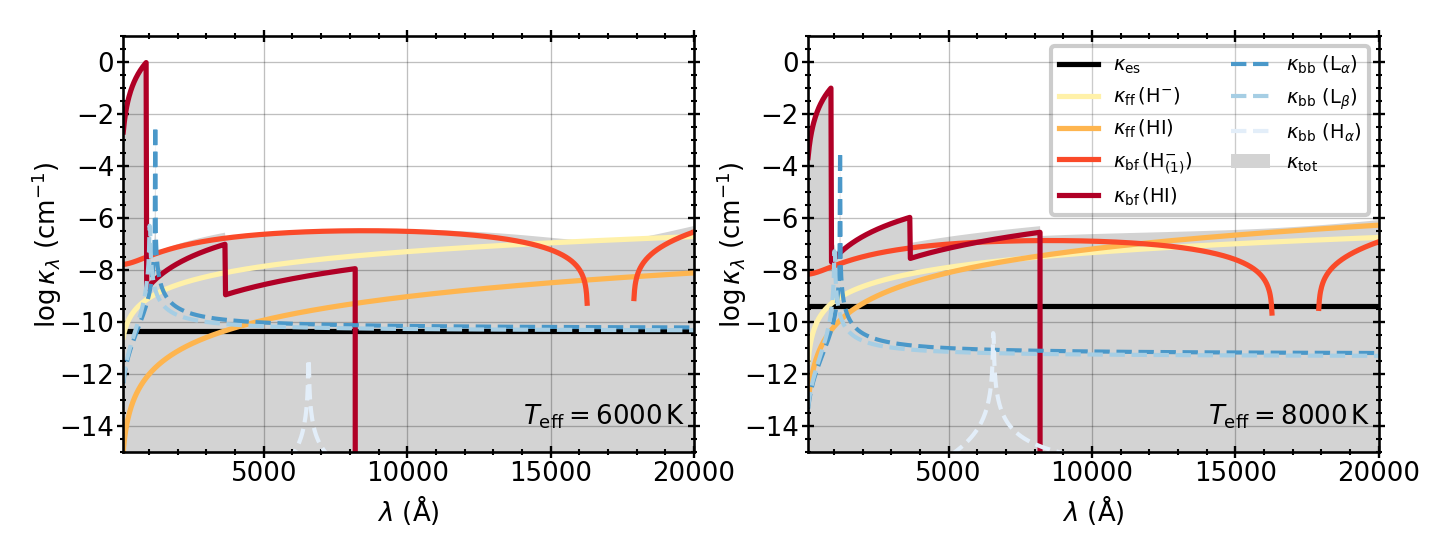

In [125]:
tauR_1 = 1
tauR = 10**lgTauR
id1 = np.argmin(np.abs(tauR - tauR_1))

ts = 2
Fig = pu.Figure(subplots=(1,2), theme='default', ratio=3, ts=ts)
axes = Fig.axes
ax = axes[0][0]
fs = Fig.fs

lw=0.4

row_names = [r'$\kappa_{\rm es}$', 
             r'$\kappa_{\rm ff} \, ({\rm H^{-}})$ ', 
             r'$\kappa_{\rm ff}\, ({\rm HI})$',
             r'$\kappa_{\rm bf}\, ({\rm H^{-}_{(1)}})$',
             r'$\kappa_{\rm bf}\, ({\rm HI})$']

cmap = mpl.colormaps['YlOrRd']
M = 4
cs = ['k']+[cmap(i) for i in np.linspace(0.1, 0.9, M)]


for k, star in enumerate(stars):
    ax = axes[0][k]
    tot_arr = np.zeros((len(lambdas)))

    for i, kappa in enumerate(kappas):
        array = arrays[star][kappa]
        arr1d = array[:, id1]

        # replace 0s with 1e-99
        arr1d[arr1d == 0] = 1e-99

        tot_arr += arr1d

        ax.plot(lambdas*1e8, np.log10(arr1d), label=row_names[i], lw=fs*lw, color=cs[i])

        NS = ['NHI1', 'NHI2', 'NHI3']
        NS_ = [results[star][n][id1] for n in NS]
        nums = [(1,2), (1,3), (2,3)]


    names = [r'$\kappa_{\rm bb}$ (L$_\alpha)$', r'$\kappa_{\rm bb}$ (L$_\beta)$', r'$\kappa_{\rm bb}$ (H$_\alpha$)']
    cmap = mpl.colormaps['Blues_r']
    M = 3
    cs_ = [cmap(i) for i in np.linspace(0.4, 0.9, M)]    
    for i, line in enumerate(lines[:]):
        wavelength =  line_dic[line]['wavelength']
        print(wavelength)
        lor = lorentzian(lambdas*1e8, wavelength, line_dic[line]['damp'])
        nl, nu = nums[i]
        kappa_bb = lor *  (NS_[nl-1] - (gs[nl-1]/gs[nu-1])*NS_[nu-1])
        ax.plot(lambdas*1e8, np.log10(kappa_bb), label=names[i], lw=0.8*fs*lw, ls='--', color=cs_[i])

        tot_arr += kappa_bb

    ax.fill_between(lambdas*1e8, np.log10(tot_arr), -100, label=r'$\kappa_{\rm tot}$', color='lightgrey', lw=0)

    #ax.plot(lambdas, lgTauR[id1]*np.ones(len(lambdas)), label=r'$\log\tau_{\rm R}=1$')

    ax.set_ylim(-15, 1)
    ax.set_xlim(lambdas[0]*1e8, lambdas[-1]*1e8)

    if k==1:
        ax.legend(fontsize=0.75*fs*ts, ncol=2, loc='upper right', frameon=True, edgecolor='black', framealpha=0.2)

    # add text
    ax.text(0.7, 0.12, rf'$T_{{\rm eff}}={star[1:]} \, {{\rm K}}$', transform=ax.transAxes, fontsize=fs*ts, va='top', ha='left', color='k')

    ax.set_ylabel(r'$\log\kappa_{\lambda} \ ({\rm cm}^{-1})$', fontsize=fs*ts, labelpad=-fs*sw*2)
    ax.set_xlabel(r'$\lambda \ ({\rm \AA})$', fontsize=fs*ts, labelpad=fs*sw*2)


    # multiply xticks per 1e8
    # xticks = ax.get_xticks()
    # xticks = [xtick*1e8 for xtick in xticks]
    # ax.set_xticklabels(xticks)

savefold = '../figures/'
if not os.path.exists(savefold):
    os.makedirs(savefold)
figname = f'ops.png'
savepath = savefold + figname

fig_h = Fig.fig_height
fig_w = Fig.fig_width
x0, y0 = 0.065*fig_w, -.035*fig_h
x1, y1 = 0.935*fig_w, 0.93*fig_h
Fig.save(savepath, 
         bbox_inches=mpl.transforms.Bbox([[x0, y0], [x1, y1]]))
